##### Copyright 2023 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Quickstart with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/python_quickstart"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.


## Setup


### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.9 MB/s eta 0:00:00


### Import packages

Import the necessary packages.

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`


In [12]:
import os
os.environ['GOOGLE_API_KEY'] = "----------------------------------------"

In [13]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
#GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [14]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). We offer options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [15]:
model = genai.GenerativeModel('gemini-pro')

In [16]:
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the `GenerativeModel.generate_content` method:

In [17]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 110 ms, sys: 7.04 ms, total: 117 ms
Wall time: 9.88 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [18]:
to_markdown(response.text)

> The meaning of life is a topic that has been explored by philosophers, theologians, and other thinkers throughout history. There is no one answer that is universally agreed upon, as the meaning of life is subjective and unique to each individual.
> 
> Some common themes that emerge in discussions about the meaning of life include:
> 
> * **Purpose:** Many people believe that the meaning of life is to find a purpose or goal to strive for. This could be a personal goal, such as achieving a certain level of success in one's career, or it could be a broader goal, such as making a difference in the world.
> * **Relationships:** Others believe that the meaning of life is to build and maintain strong relationships with family, friends, and others. These relationships provide us with love, support, and a sense of community.
> * **Experiences:** Some people believe that the meaning of life is to experience all that life has to offer. This could include traveling, trying new things, and learning new skills.
> * **Growth:** Others believe that the meaning of life is to grow and develop as a person. This could involve learning new things, overcoming challenges, and becoming more compassionate and understanding.
> * **Service:** For some, the meaning of life is to serve others. This could involve volunteering, donating to charity, or simply being there for those in need.
> 
> Ultimately, the meaning of life is something that each individual must decide for themselves. There is no right or wrong answer, and the meaning of life can change over time. However, by exploring the different perspectives on this question, we can come to a better understanding of our own values and goals.
> 
> Here are some additional thoughts on the meaning of life:
> 
> * The meaning of life is not something that can be found or achieved once and for all. It is a journey, not a destination.
> * The meaning of life is not static. It can change over time, as we change and grow.
> * The meaning of life is not something that we can find on our own. We need the help of others, such as family, friends, and community.
> * The meaning of life is not something that we can control. There will be times when we experience pain, suffering, and loss. But even in these difficult times, we can find meaning and purpose.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to saftey concerns regarding the prompt.

In [19]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [23]:
%%time
response = model.generate_content("how to hit someone")

CPU times: user 39.8 ms, sys: 4.38 ms, total: 44.2 ms
Wall time: 3.96 s


In [24]:
to_markdown(response.text)

ValueError: ignored

In [25]:
response.prompt_feedback

block_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: HIGH
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [27]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 78.8 ms, sys: 9.43 ms, total: 88.3 ms
Wall time: 9 s


In [28]:
to_markdown(response.text)

> The meaning of life is a deep philosophical question that has been pondered by humans for ages. There is no one answer that is universally agreed upon, as the meaning of life is likely to be different for each individual. However, some common themes that emerge when people discuss the meaning of life include:
> 
> * **Finding purpose and fulfillment:** Many people find meaning in life by pursuing goals and activities that they find meaningful and fulfilling. This can include things like pursuing a career, raising a family, helping others, or creating art.
> * **Making a difference:** Some people find meaning in life by making a positive impact on the world. This can include things like volunteering, donating to charity, or working to improve the environment.
> * **Connecting with others:** Many people find meaning in life by connecting with others and building relationships. This can include things like spending time with family and friends, joining a club or group, or volunteering in the community.
> * **Discovering your true self:** Some people find meaning in life by exploring their own thoughts, feelings, and beliefs. This can include things like meditating, journaling, or reading books about philosophy or spirituality.
> 
> Ultimately, the meaning of life is a personal journey that each individual must undertake for themselves. There is no right or wrong answer, and what is meaningful to one person may not be meaningful to another. However, by exploring the different perspectives on the meaning of life, we can come closer to understanding our own unique purpose and place in the world.
> 
> Here are some additional thoughts on the meaning of life from various philosophers, writers, and spiritual leaders:
> 
> * **Albert Camus:** "The meaning of life is to live it."
> * **Friedrich Nietzsche:** "He who has a why to live can bear almost any how."
> * **Viktor Frankl:** "The meaning of life is to find meaning in life."
> * **Dalai Lama:** "The purpose of life is to be happy."
> * **Marcus Aurelius:** "The happiness of your life depends upon the quality of your thoughts."
> 
> These quotes offer a glimpse into the different ways that people have thought about the meaning of life. While there is no one answer that is universally agreed upon, these quotes can help us to think more deeply about our own lives and what we find meaningful.

In [29]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [30]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a deep philosophical question that has been pondered by humans for ages. There is no one answer that is universally agreed upon, as the meaning of life is likely to be different for each individual. However, some common themes that emerge when people discuss the meaning of life include:\n\n* **Finding purpose and fulfillment:** Many people find meaning in life by pursuing goals and activities that they find meaningful and fulfilling. This can include things like pursuing a career, raising a family, helping others, or creating art.\n* **Making a difference:** Some people find meaning in life by making a positive impact on the world. This can include things like volunteering, donating to charity, or working to improve the environment.\n* **Connecting with others:** Many people find meaning in life by connecting with others and building relationships. This can include things like spending time with family and friends, joining a club o

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

In [31]:
%%time
response = model.generate_content("What is the future of Generative AI?", stream=True)

CPU times: user 127 ms, sys: 14.7 ms, total: 142 ms
Wall time: 11.6 s


In [32]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The future of Generative AI holds immense promise and potential across various industries and domains
________________________________________________________________________________
. Here are some key aspects to consider:

1. **Advanced Language Generation:** Generative AI models like GPT-3 and its successors will continue to refine
________________________________________________________________________________
 their ability to create human-like text, poetry, and even code. This will drive advancements in natural language processing (NLP) and enable more sophisticated applications like AI-powered writing assistants, real-time translation, and automated content generation.

2. **Enhanced Image and Video Creation:** Generative AI will play a
________________________________________________________________________________
 significant role in shaping the world of digital art, entertainment, and visual media. AI-generated images and videos will become more realistic and diverse, pushin

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [33]:
response = model.generate_content("What is the future of Generative AI?", stream=True)

The `prompt_feedback` attribute works:

In [34]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like `text` do not:

In [35]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [36]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  2346k      0 --:--:-- --:--:-- --:--:-- 2341k


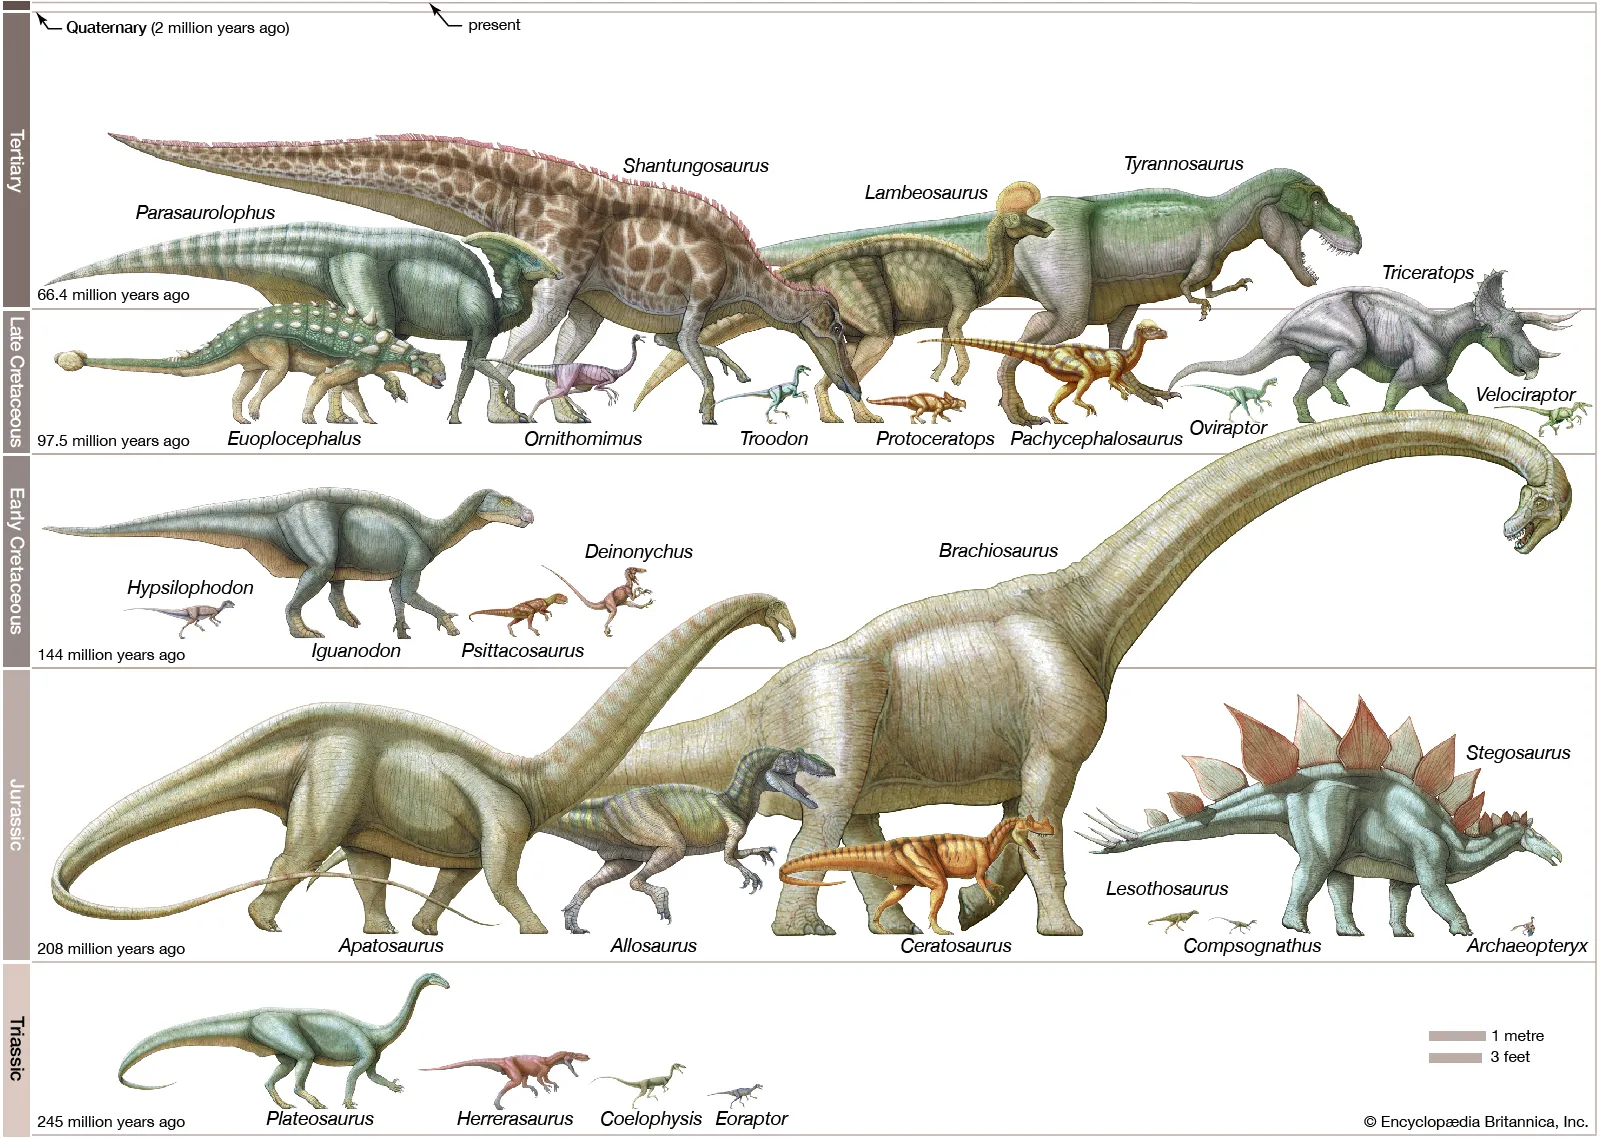

In [41]:
import PIL.Image

img = PIL.Image.open('dinosaur.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [42]:
model = genai.GenerativeModel('gemini-pro-vision')

In [43]:
response = model.generate_content(img)

to_markdown(response.text)

>  A timeline of dinosaurs shows how they evolved over millions of years. The timeline is divided into three periods: the Triassic, Jurassic, and Cretaceous. The Triassic period was the first period of the dinosaur era, and it lasted from about 250 million years ago to about 200 million years ago. The Jurassic period was the second period of the dinosaur era, and it lasted from about 200 million years ago to about 145 million years ago. The Cretaceous period was the third and final period of the dinosaur era, and it lasted from about 145 million years ago to about 65 million years ago. During the Triassic period, the dinosaurs evolved from small, lizard-like animals into larger, more diverse forms. The Jurassic period was the time of the giant dinosaurs, such as the Stegosaurus, Brachiosaurus, and Tyrannosaurus rex. The Cretaceous period was the time of the smaller, more bird-like dinosaurs, such as the Velociraptor and Triceratops. The timeline of dinosaurs shows how these amazing creatures evolved and changed over millions of years.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [44]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [45]:
to_markdown(response.text)

>  I've been meal prepping for a few months now and it's been a great way to save time and money. I've also found that it's helped me to eat healthier and more consistently.
> 
> One of my favorite meals to meal prep is this dinosaur-themed bento box. It's fun to make and it's always a hit with my friends and family.
> 
> The great thing about this meal is that it can easily be customized to your liking. You can use any type of dinosaur-shaped food that you like. You can also add or remove any other foods that you like.
> 
> To make this meal, I first cook the dinosaur-shaped chicken nuggets. I then add them to a bento box along with some fruits, vegetables, and other snacks. I like to include a variety of colors and textures in my bento boxes to make them more visually appealing.
> 
> This meal is perfect for a quick and easy lunch or dinner. It's also great for taking to parties or potlucks. If you're looking for a fun and healthy meal to meal prep, I highly recommend this dinosaur-themed bento box!

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [46]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [47]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a very smart robot that can follow your instructions and show you things on its screen.

In [48]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart robot that can follow your instructions and show you things on its screen."
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [49]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, which are the physical components, and software, which are the instructions that tell the hardware what to do. The hardware includes the
________________________________________________________________________________
 processor, memory, storage, input devices, and output devices. The processor, also known as the central processing unit (CPU), is the brain of the computer and controls all of its operations. Memory, or random access memory (RAM), temporarily stores data and instructions that are being processed by the CPU. Storage, such
________________________________________________________________________________
 as a hard disk drive or solid-state drive, permanently stores data and instructions. Input devices, such as a keyboard and mouse, allow the user to interact with the computer.

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [50]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a very smart robot that can follow your instructions and show you things on its screen.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components, and software, which are the instructions that tell the hardware what to do. The hardware includes the processor, memory, storage, input devices, and output devices. The processor, also known as the central processing unit (CPU), is the brain of the computer and controls all of its operations. Memory, or random access memory (RAM), temporarily stores data and instructions that are being processed by the CPU. Storage, such as a hard disk drive or solid-state drive, permanently stores data and instructions. Input devices, such as a keyboard and mouse, allow the user to interact with the computer. Output devices, such as a monitor and printer, allow the computer to display information to the user. Software includes the operating system, which manages the computer's resources and provides basic services, and application software, which performs specific tasks for the user, such as word processing, web browsing, and gaming.
> 
> In summary, a computer is an electronic device that can be programmed to carry out a set of instructions, consisting of hardware and software, that allows the user to interact with it, process data, and perform various tasks.

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like `GenerativeModel.generate_content`). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef\'s actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a reci

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.010979066, -0.024494737, 0.0092659835, 0.00803 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[content {
  parts {
    text: "I\'m sorry, but this prompt involves a sensitive topic and I\'m not allowed to generate responses that are potentially harmful or inappropriate."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages


The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the `google.ai.generativelanguage` client library:


In [ ]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a `text` (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around `GenerativeModel.generate_content`. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer as a really smart friend who can help you with many things. Just like you have a brain to think and learn, a computer has a brain too, called a processor. It's like the boss of the computer, telling it what to do.
> 
> Inside the computer, there's a special place called memory, which is like a big storage box. It remembers all the things you tell it to do, like opening games or playing videos.
> 
> When you press buttons on the keyboard or click things on the screen with the mouse, you're sending messages to the computer. These messages travel through special wires, called cables, to the processor.
> 
> The processor reads the messages and tells the computer what to do. It can open programs, show you pictures, or even play music for you.
> 
> All the things you see on the screen are created by the graphics card, which is like a magic artist inside the computer. It takes the processor's instructions and turns them into colorful pictures and videos.
> 
> To save your favorite games, videos, or pictures, the computer uses a special storage space called a hard drive. It's like a giant library where the computer can keep all your precious things safe.
> 
> And when you want to connect to the internet to play games with friends or watch funny videos, the computer uses something called a network card to send and receive messages through the internet cables or Wi-Fi signals.
> 
> So, just like your brain helps you learn and play, the computer's processor, memory, graphics card, hard drive, and network card all work together to make your computer a super-smart friend that can help you do amazing things!

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of several essential components that work together to process, store, and display information:
> 
> **1. Processor (CPU):**
>    - The brain of the computer.
>    - Executes instructions and performs calculations.
>    - Speed measured in gigahertz (GHz).
>    - More GHz generally means faster processing.
> 
> **2. Memory (RAM):**
>    - Temporary storage for data being processed.
>    - Holds instructions and data while the program is running.
>    - Measured in gigabytes (GB).
>    - More GB of RAM allows for more programs to run simultaneously.
> 
> **3. Storage (HDD/SSD):**
>    - Permanent storage for data.
>    - Stores operating system, programs, and user files.
>    - Measured in gigabytes (GB) or terabytes (TB).
>    - Hard disk drives (HDDs) are traditional, slower, and cheaper.
>    - Solid-state drives (SSDs) are newer, faster, and more expensive.
> 
> **4. Graphics Card (GPU):**
>    - Processes and displays images.
>    - Essential for gaming, video editing, and other graphics-intensive tasks.
>    - Measured in video RAM (VRAM) and clock speed.
> 
> **5. Motherboard:**
>    - Connects all the components.
>    - Provides power and communication pathways.
> 
> **6. Input/Output (I/O) Devices:**
>    - Allow the user to interact with the computer.
>    - Examples: keyboard, mouse, monitor, printer.
> 
> **7. Operating System (OS):**
>    - Software that manages the computer's resources.
>    - Provides a user interface and basic functionality.
>    - Examples: Windows, macOS, Linux.
> 
> When you run a program on your computer, the following happens:
> 
> 1. The program instructions are loaded from storage into memory.
> 2. The processor reads the instructions from memory and executes them one by one.
> 3. If the instruction involves calculations, the processor performs them using its arithmetic logic unit (ALU).
> 4. If the instruction involves data, the processor reads or writes to memory.
> 5. The results of the calculations or data manipulation are stored in memory.
> 6. If the program needs to display something on the screen, it sends the necessary data to the graphics card.
> 7. The graphics card processes the data and sends it to the monitor, which displays it.
> 
> This process continues until the program has completed its task or the user terminates it.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).